In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris = load_iris()

iris_df = pd.DataFrame(data = iris.data,columns = iris.feature_names)
iris_df['target']= iris.target

In [3]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#converted into binary classification
iris_df = iris_df[iris_df['target']!=0]

In [5]:
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
146,6.3,2.5,5.0,1.9,2
136,6.3,3.4,5.6,2.4,2
72,6.3,2.5,4.9,1.5,1
135,7.7,3.0,6.1,2.3,2
147,6.5,3.0,5.2,2.0,2
110,6.5,3.2,5.1,2.0,2
104,6.5,3.0,5.8,2.2,2
70,5.9,3.2,4.8,1.8,1
97,6.2,2.9,4.3,1.3,1


In [6]:
#keeping two featurs only for simplicity, sepal width, petal length
iris_df=iris_df.drop(columns=['sepal length (cm)','petal width (cm)'])
iris_df

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [7]:
iris_df.rename(columns={'sepal width (cm)':'SepalWidth','petal length (cm)': 'PetalLength'},inplace=True)
iris_df

,SepalWidth,PetalLength,target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


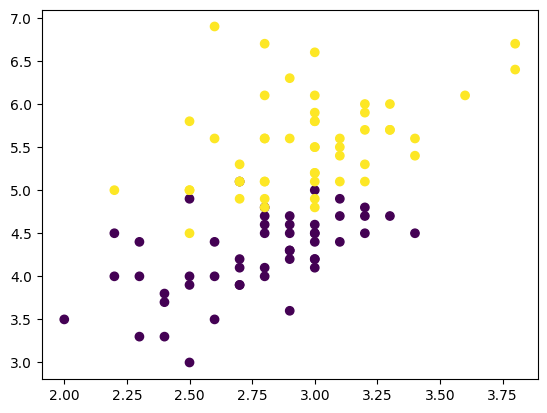

In [10]:
plt.scatter(iris_df['SepalWidth'],iris_df['PetalLength'],c = iris_df['target'])

In [11]:
#sampling the dataset
iris_df = iris_df.sample(100)

#taking only 10 rows for training, 5 for validation, and 5 for testing
train_set = iris_df.iloc[:60,:].sample(10)
val_set=iris_df.iloc[60:80,:].sample(5)
test_set = iris_df.iloc[80:,:].sample(5)


In [12]:
print('Training set: \n',train_set)
print('Validation set: \n',val_set)
print('Testing set: \n',test_set)

Training set: 
      SepalWidth  PetalLength  target
68          2.2          4.5       1
121         2.8          4.9       2
76          2.8          4.8       1
59          2.7          3.9       1
92          2.6          4.0       1
57          2.4          3.3       1
136         3.4          5.6       2
138         3.0          4.8       2
113         2.5          5.0       2
106         2.5          4.5       2
Validation set: 
      SepalWidth  PetalLength  target
99          2.8          4.1       1
117         3.8          6.7       2
71          2.8          4.0       1
107         2.9          6.3       2
77          3.0          5.0       1
Testing set: 
      SepalWidth  PetalLength  target
105         3.0          6.6       2
88          3.0          4.1       1
124         3.3          5.7       2
142         2.7          5.1       2
103         2.9          5.6       2


In [13]:
#extrating X_test and y_test from validation set
X_test = val_set.iloc[:,:2]
y_test = val_set.iloc[:,-1]

print('X_test: \n',X_test)
print('y_test: \n',y_test)

X_test: 
      SepalWidth  PetalLength
99          2.8          4.1
117         3.8          6.7
71          2.8          4.0
107         2.9          6.3
77          3.0          5.0
y_test: 
 99     1
117    2
71     1
107    2
77     1
Name: target, dtype: int32


Bagging algorithm

Now we will train 3 decision trees o randomly sampled dataset

In [14]:
#dataset for tree 1

df_bag = train_set.sample(8,replace = True)  #80% training data with replacement

X_train = df_bag.iloc[:,:2]
y_train = df_bag.iloc[:,-1]

df_bag

,SepalWidth,PetalLength,target
113,2.5,5.0,2
57,2.4,3.3,1
76,2.8,4.8,1
59,2.7,3.9,1
59,2.7,3.9,1
106,2.5,4.5,2
76,2.8,4.8,1
76,2.8,4.8,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [16]:
def evaluate(clf,X_train,y_train):
    clf.fit(X_train,y_train)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X_train.values,y_train.values,clf = clf, legend = 2)
    y_pred = clf.predict(X_test)

    print('Accuracy: ',accuracy_score(y_pred,y_test))

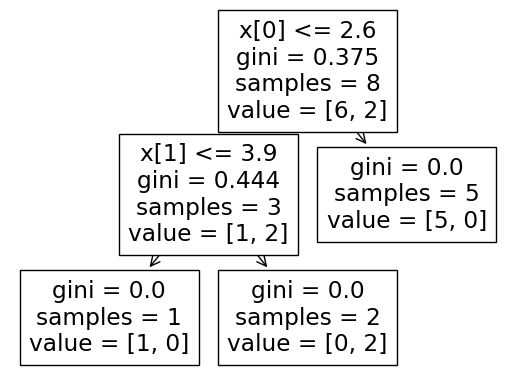

Accuracy:  0.6


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


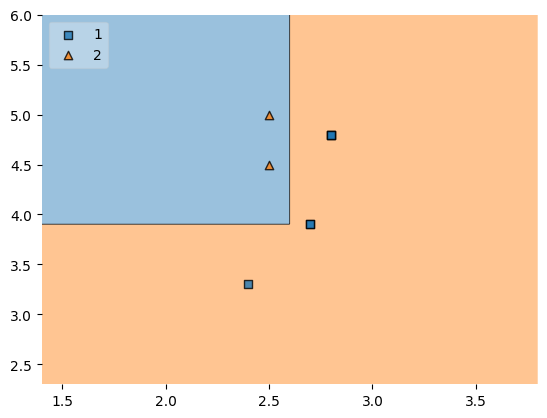

In [17]:
dt_bag1 = DecisionTreeClassifier()  #fully grown decision tree, Low bias and High variance

evaluate(dt_bag1,X_train,y_train)


In [18]:
# dataset for tree 2
df_bag = train_set.sample(8,replace = True)  #80% training data with replacement

X_train = df_bag.iloc[:,:2]
y_train = df_bag.iloc[:,-1]

df_bag 

,SepalWidth,PetalLength,target
136,3.4,5.6,2
76,2.8,4.8,1
57,2.4,3.3,1
59,2.7,3.9,1
92,2.6,4.0,1
76,2.8,4.8,1
76,2.8,4.8,1
59,2.7,3.9,1


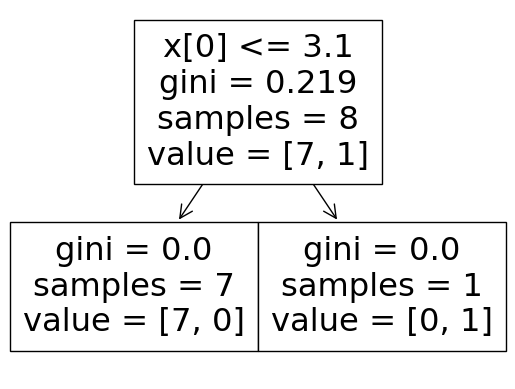

Accuracy:  0.8


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


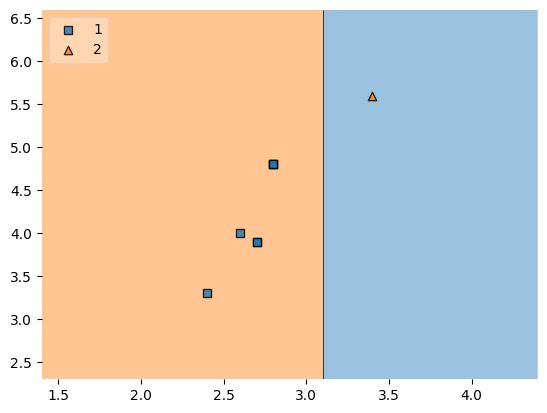

In [19]:
dt_bag2 = DecisionTreeClassifier()

evaluate(dt_bag2,X_train,y_train)


In [20]:
# dataset for tree 3
df_bag = train_set.sample(8,replace = True)  #80% training data with replacement

X_train = df_bag.iloc[:,:2]
y_train = df_bag.iloc[:,-1]

df_bag 

,SepalWidth,PetalLength,target
121,2.8,4.9,2
57,2.4,3.3,1
68,2.2,4.5,1
113,2.5,5.0,2
106,2.5,4.5,2
113,2.5,5.0,2
113,2.5,5.0,2
113,2.5,5.0,2


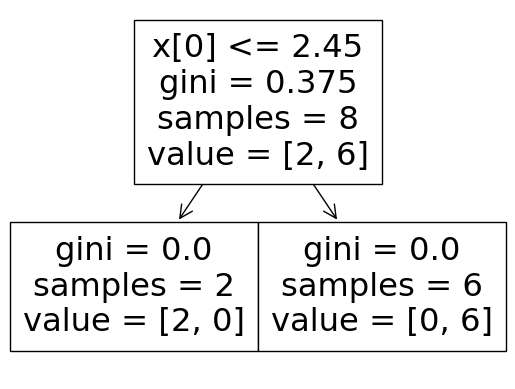

Accuracy:  0.4


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


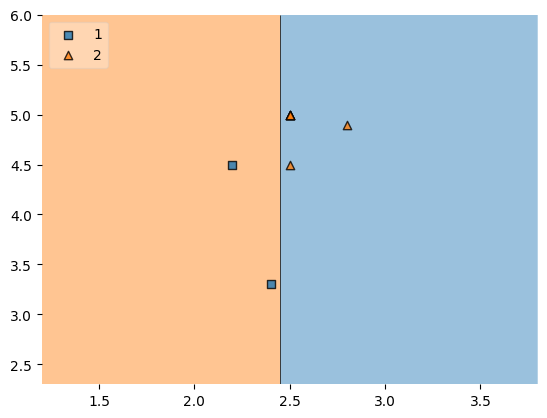

In [21]:
dt_bag3 = DecisionTreeClassifier()

evaluate(dt_bag3,X_train,y_train)

In [22]:
#lets see the performance on test set of all the three models
test_set


,SepalWidth,PetalLength,target
105,3.0,6.6,2
88,3.0,4.1,1
124,3.3,5.7,2
142,2.7,5.1,2
103,2.9,5.6,2


In [25]:
#input for models: 3.2,5.7 and target is 2
print('Predictor 1 : ',dt_bag1.predict(np.array([[3.2,5.7]])))
print('Predictor 1 : ',dt_bag2.predict(np.array([[3.2,5.7]])))
print('Predictor 1 : ',dt_bag2.predict(np.array([[3.2,5.7]])))

Predictor 1 :  [1]
Predictor 1 :  [2]
Predictor 1 :  [2]


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
#input for models: 3.1,4.7 and target is 1
print('Predictor 1 : ',dt_bag1.predict(np.array([[3.1,4.7]])))
print('Predictor 1 : ',dt_bag2.predict(np.array([[3.1,4.7]])))
print('Predictor 1 : ',dt_bag2.predict(np.array([[3.1,4.7]])))

Predictor 1 :  [1]
Predictor 1 :  [1]
Predictor 1 :  [1]


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting: Row sampling without replacement

In [26]:
train_set

,SepalWidth,PetalLength,target
68,2.2,4.5,1
121,2.8,4.9,2
76,2.8,4.8,1
59,2.7,3.9,1
92,2.6,4.0,1
57,2.4,3.3,1
136,3.4,5.6,2
138,3.0,4.8,2
113,2.5,5.0,2
106,2.5,4.5,2


In [27]:
#bydefault replace is False
train_set.sample(8)

,SepalWidth,PetalLength,target
92,2.6,4.0,1
113,2.5,5.0,2
68,2.2,4.5,1
76,2.8,4.8,1
106,2.5,4.5,2
57,2.4,3.3,1
136,3.4,5.6,2
138,3.0,4.8,2


Random subspaces: Column sampling with or without replacement

In [32]:
#loading whole iris dataset
iris = load_iris()

iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
df1 = iris_df.sample(5)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
134,6.1,2.6,5.6,1.4,2
14,5.8,4.0,1.2,0.2,0
75,6.6,3.0,4.4,1.4,1
60,5.0,2.0,3.5,1.0,1
7,5.0,3.4,1.5,0.2,0


In [33]:
#sampling the columns
df1.sample(2,replace = True,axis = 1)  # 2 indicates randomly selecting 2 columns
 

,sepal width (cm),sepal length (cm)
134,2.6,6.1
14,4.0,5.8
75,3.0,6.6
60,2.0,5.0
7,3.4,5.0


Random Patches: Sampling w.r.t rows as well as columns

In [35]:
#taking 10 samples from original dataset
df2 = iris_df.sample(10)

#first row sampling and then column sampling, we can do reverse also

df2.sample(8,replace = True).sample(3,replace=True,axis = 1)



,petal width (cm),species,petal width (cm)
1,0.2,0,0.2
52,1.5,1,1.5
1,0.2,0,0.2
70,1.8,1,1.8
145,2.3,2,2.3
64,1.3,1,1.3
97,1.3,1,1.3
49,0.2,0,0.2
